In [1]:
import pickle
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests

In [2]:
def do_ks_test(X, Y, idx, tf):
    feature_0 = Y[np.where(X[:, idx] == 0)[0]]
    feature_1 = Y[np.where(X[:, idx] == 1)[0]]
    if feature_0.shape[0] and feature_1.shape[0]:
        data = (feature_0, feature_1)
        mww_boxplot(data)
        return (tf, *mannwhitneyu(feature_0, feature_1), *ks_2samp(feature_0, feature_1))
    return None

In [3]:
def mww_boxplot(data):
    #Creates two subplots and unpacks the output array immediately
    labels = ['{}:{}'.format(idx, len(x)) for idx, x in enumerate(data)]
    
    fig = plt.figure(figsize=(2.0, 4.0), dpi=200)
    ax = sns.boxplot(data=data, showfliers=False)
    # ax.axes.get_xaxis().set_visible(False)
    ax.set_xticklabels(labels)
    ax.set_ylabel(r'$\Delta Z_{\Psi}$', fontsize=14)
    fig.tight_layout()
#     fig.savefig('{}_boxplot.png'.format(TF), transparent=True)

In [4]:
def plot_cdf(data) -> None:
    labels = ['{}:{}'.format(idx, len(x)) for idx, x in enumerate(data)]

    _, ax = plt.subplots()
    for d, label in zip(data, labels):
        n = np.arange(1, len(d) + 1) / np.float(len(d))
        Xs = np.sort(d)
        ax.step(Xs, n, label=label)

    plt.legend(loc='upper left')
#     plt.savefig('{}.png'.format(file_out), dpi=300)
#     plt.clf()
#     plt.close()
#     plt.gcf().clear()

In [29]:
with open('../input/weight_zscore_rf_delta_data.pickle', mode='rb') as fh:
    X, Y, Tf_list = pickle.load(fh)
#     Y = Y['PSI'].values

In [7]:
idx = Tf_list.index('ZNF354C')
TF = Tf_list[idx]

In [43]:
Y['Gene'].sort_values().unique()

[ENSG00000000419, ENSG00000000457, ENSG00000001167, ENSG00000001460, ENSG00000001497, ..., ENSG00000273000, ENSG00000273045, ENSG00000273047, ENSG00000273247, ENSG00000273345]
Length: 7438
Categories (7438, object): [ENSG00000000419, ENSG00000000457, ENSG00000001167, ENSG00000001460, ..., ENSG00000273045, ENSG00000273047, ENSG00000273247, ENSG00000273345]

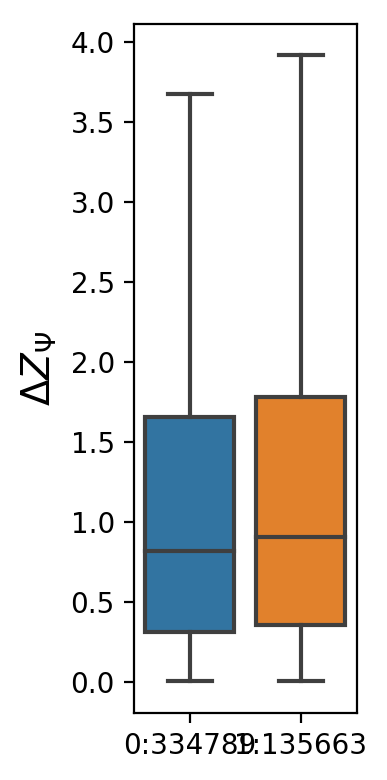

In [34]:
result = do_ks_test(X, Y, idx, TF)

In [36]:
result

('ZNF354C',
 21649764026.5,
 2.047754443728455e-139,
 0.03501410366999269,
 2.603589922169555e-103)

In [37]:
d = {result[0]: result[1:]}

In [10]:
import pandas as pd

In [39]:
d

{'ZNF354C': (21649764026.5,
  2.047754443728455e-139,
  0.03501410366999269,
  2.603589922169555e-103)}

In [41]:
pd.DataFrame.from_dict(d, orient='index', columns=['mann_stat', 'mann_pval', 'ks_stat', 'ks_pval'])

,mann_stat,mann_pval,ks_stat,ks_pval
ZNF354C,2.164976e+10,2.047754e-139,0.035014,2.603590e-103


In [68]:
import glob
import shutil
from os.path import basename

In [51]:
glob.glob('test/a*.txt')

['test/a_1.txt', 'test/a.txt']

In [52]:
path1 = './test/'
tf = 'a'
path2 = 'test2'

In [70]:
for file in glob.glob('{}{}*.txt'.format(path1, tf)):
    shutil.move(file, path1 + path2)

In [11]:
with open('../gene_tfbs.pkl', 'rb') as fh:
    tfbs_list = pickle.load(fh)

In [13]:
tfbs_df = (~pd.DataFrame.from_dict(tfbs_list)[Tf_list]).astype(np.int)

In [27]:
tfbs_df['ALX3'].size

57773

In [22]:
for i in tfbs_df.columns:
    print(i, sum(tfbs_df[i]))

ALX3 6596
AR 268
ASCL1 464
ATF4 2487
ATF7 9385
BACH2 456
BARX1 7614
BATF3 3742
BCL6B 669
BHLHE40 7408
BHLHE41 8390
CDX1 2911
CDX2 1277
CEBPA 942
CEBPB 3625
CEBPD 3736
CEBPE 3747
CEBPG 6229
CENPB 6633
CLOCK 6081
CREB1 3854
CREB3 9494
CREB3L1 2467
CTCF 543
CTCFL 1476
CUX1 12510
CUX2 13396
DBP 10513
DLX6 6558
E2F1 20196
E2F2 11764
E2F3 16114
E2F4 12278
E2F6 89
E2F7 1836
E2F8 1134
EBF1 1441
EGR1 3629
EGR2 4316
EGR3 2283
EGR4 1762
EHF 557
ELF1 834
ELF3 469
ELF4 1125
ELF5 296
ELK1 6925
ELK3 4940
ELK4 260
EMX2 8378
EOMES 558
ERF 2200
ERG 1965
ESR1 1893
ESR2 408
ESRRA 217
ESRRB 790
ETS1 1420
ETV1 5090
ETV2 596
ETV3 2424
ETV4 3557
ETV5 7684
ETV6 327
EVX1 4400
FEV 2695
FLI1 2075
FOS 1337
FOSL1 755
FOSL2 712
FOXA1 1048
FOXB1 2486
FOXC1 1545
FOXC2 1351
FOXD1 2828
FOXD2 1609
FOXF2 1855
FOXG1 3277
FOXH1 1453
FOXK1 941
FOXK2 1710
FOXL1 1926
FOXO3 875
FOXO4 933
FOXO6 1079
FOXP1 1097
FOXP2 643
FOXP3 1664
GABPA 950
GATA2 3397
GATA3 5107
GATA5 4556
GATA6 854
GCM1 939
GLI2 877
GLIS1 3936
GLIS2 1077
GLIS3 